# Численное вычисление интеграла
## Студент: Александар Симеунович 382008-4
## Задача номер 3:
Используя интеграл$$-\frac{4}{9} = \int_0^1 \sqrt{x}\ln x dx$$можно найти приближение к -4/9.
Используйте правило прямоугольников, трапеций и Симпсона с 2, 4,8,16,32,64 и 128 узлами. Затабулируйте погрешность. Как уменьшается погрешность при удвоении числа элементарных отрезков? Почему с некоторого момента погрешность не уменьшается? Составленная программа должна выводить графики подинтегральных функций, табулированные погрешности и значения интегральных сумм с графиками.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

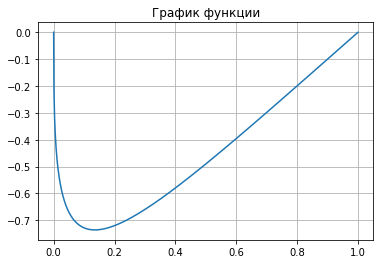

In [30]:
x = np.linspace(1e-12,1,1000)
y = np.sqrt(x)*np.log(x)
plt.title('График функции')
plt.plot(x,y)
plt.grid()
pass

In [99]:

a = 1e-12 
b = 1 
cislo_uzlov = [2,4,8,16,32,64,128]
znacenie=-4/9
funk_znac=np.linspace(znacenie,znacenie,7)
def VipisatZnaceniyaMetoda(metod):
    print("%-30s%-25s%-15s" % ("Количество узлов:","Значение интеграла:", "Погрешность:"))
    for i in range(7):
        print("%-30d%-25f%-15f" % (cislo_uzlov[i], metod[i],abs(znacenie-metod[i])))
    return None
def NarisovatGrafik(funkcii,tekst_za_funkcii,imya_grafika):
        plt.rcParams["figure.figsize"] = (20,15)
        plt.xticks([2,4,8,16,32,64,128])
        for funk in funkcii:
            plt.plot(cislo_uzlov,funk)
        for texts in tekst_za_funkcii:
            plt.text(texts[0],texts[1],texts[2])
        plt.title(imya_grafika)
        plt.grid()
        return None
pass

# Формула левых прямоугольников:
  {\displaystyle \int _{a}^{b}f(x)\,dx\approx \sum _{i=0}^{n-1}f(x_{i})(x_{i+1}-x_{i}).}\int _{a}^{b}f(x)\,dx\approx \sum _{{i=0}}^{{n-1}}f(x_{i})(x_{{i+1}}-x_{i}).
# Формула правых прямоугольников:
  {\displaystyle \int _{a}^{b}f(x)\,dx\approx \sum _{i=1}^{n}f(x_{i})(x_{i}-x_{i-1}).}\int _{a}^{b}f(x)\,dx\approx \sum _{{i=1}}^{n}f(x_{i})(x_{i}-x_{{i-1}}).
# Формула средних прямоугольников:
 {\displaystyle \int _{a}^{b}f(x)\,dx\approx \sum _{i=0}^{n-1}f\left({\frac {x_{i}+x_{i+1}}{2}}\right)(x_{i+1}-x_{i})=\sum _{i=1}^{n}f\left({\frac {x_{i-1}+x_{i}}{2}}\right)(x_{i}-x_{i-1}).}\int _{a}^{b}f(x)\,dx\approx \sum _{{i=0}}^{{n-1}}f\left({\frac  {x_{i}+x_{{i+1}}}{2}}\right)(x_{{i+1}}-x_{i})=\sum _{{i=1}}^{n}f\left({\frac  {x_{{i-1}}+x_{i}}{2}}\right)(x_{i}-x_{{i-1}}).
## Для представления методов Симсона и трапеции будем пользоваться встроенным функциями integrate.trapz и integrate.simps

In [32]:
def PraviePramo(cislo):
    znaceniya_pravih=[]
    for n in cislo:
        dlina = (b - a)/(n)
        x = np.arange(a + dlina, b + np.finfo(float).eps, dlina)  
        y = np.sqrt(x)*(np.log(x))                                     
        suma_plosad=dlina*sum(y)
        znaceniya_pravih.append(suma_plosad)
    return znaceniya_pravih
def LeviePramo(cislo):
    znaceniya_levih=[]
    for n in cislo:
         dlina = (b - a)/(n)
         x = np.arange(a, b, dlina)
         y = np.sqrt(x)*(np.log(x))
         suma_plosad = dlina*sum(y)
         znaceniya_levih.append(suma_plosad)
    return znaceniya_levih
def SredniePramo(cislo):
    znaceniya_srednih=[]
    for n in cislo:
        dlina = (b - a)/(n)
        x = np.arange(a + dlina/2, b, dlina)
        y = np.sqrt(x)*(np.log(x))
        suma_plosad = dlina*sum(y)
        znaceniya_srednih.append(suma_plosad)
    return znaceniya_srednih
def Metod_Simpsona(cislo):
    znaceniya_simpson=[]
    for n in cislo:
        x = np.linspace(a, b, n + 1)
        y = np.sqrt(x)*(np.log(x))
        integral = integrate.simps(y,x)
        znaceniya_simpson.append(integral)
    return znaceniya_simpson
def Metod_Trapecii(cislo): 
    znaceniya_trape=[]
    for n in cislo:
        x = np.linspace(a, b, n+1)
        y = np.sqrt(x)*(np.log(x))
        integral = integrate.trapz(y, x)
        znaceniya_trape.append(integral)
    return znaceniya_trape

Количество узлов:             Значение интеграла:      Погрешность:   
2                             -0.245078                0.199366       
4                             -0.358111                0.086333       
8                             -0.408093                0.036351       
16                            -0.429476                0.014968       
32                            -0.438390                0.006054       
64                            -0.442031                0.002413       
128                           -0.443494                0.000951       
Количество узлов:             Значение интеграла:      Погрешность:   
2                             -0.245065                0.199380       
4                             -0.358104                0.086340       
8                             -0.408090                0.036354       
16                            -0.429475                0.014970       
32                            -0.438389                0.006055       
64    

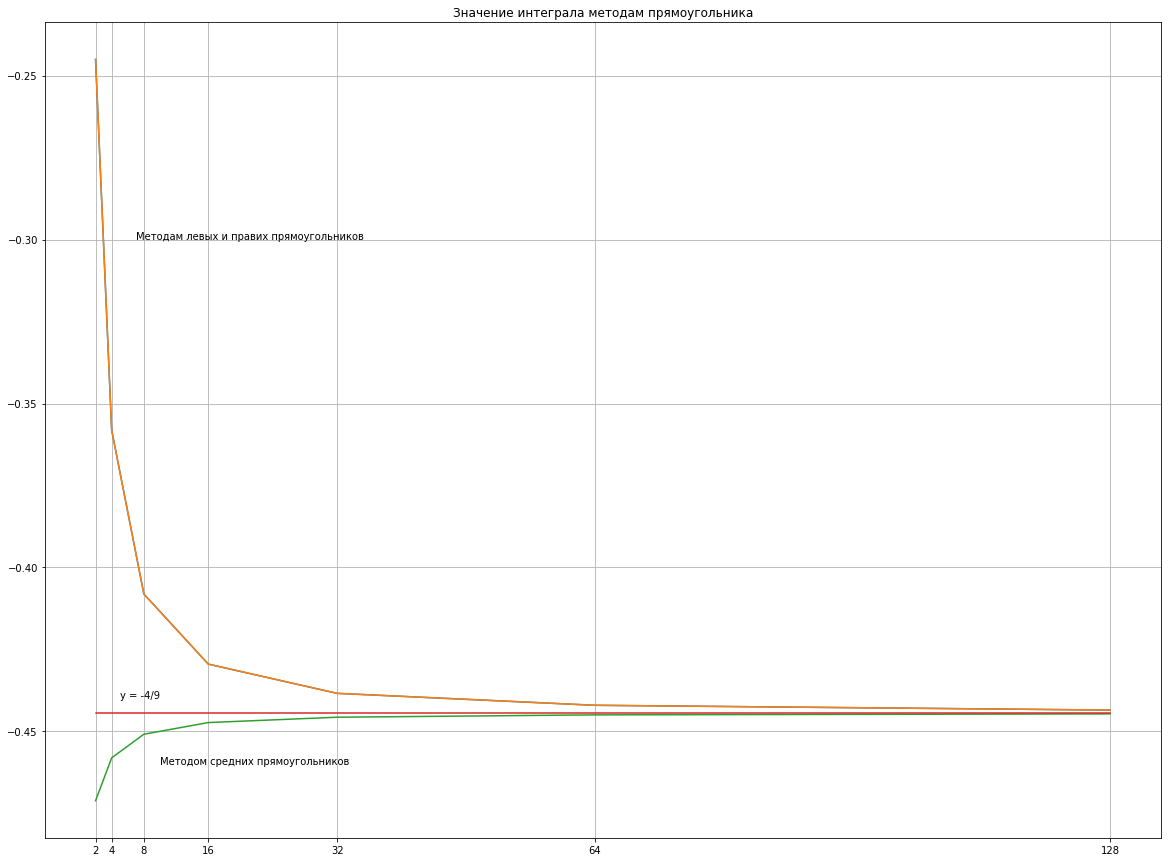

In [100]:
pravie_pramo=PraviePramo(cislo_uzlov)
levie_pramo=LeviePramo(cislo_uzlov)
srednie_pramo=SredniePramo(cislo_uzlov)
VipisatZnaceniyaMetoda(levie_pramo)
VipisatZnaceniyaMetoda(pravie_pramo)
VipisatZnaceniyaMetoda(srednie_pramo)
NarisovatGrafik([pravie_pramo,levie_pramo,srednie_pramo,funk_znac],[[5,-0.44, "y = -4/9"],[7,-0.3, "Методам левых и правих прямоугольников"],[10,-0.46,"Методом средних прямоугольников"]],"Значение интеграла методам прямоугольника")

Количество узлов:             Значение интеграла:      Погрешность:   
2                             -0.245071                0.199373       
4                             -0.358108                0.086337       
8                             -0.408092                0.036353       
16                            -0.429475                0.014969       
32                            -0.438390                0.006055       
64                            -0.442031                0.002414       
128                           -0.443494                0.000951       
Количество узлов:             Значение интеграла:      Погрешность:   
2                             -0.326757                0.117687       
4                             -0.395786                0.048658       
8                             -0.424753                0.019691       
16                            -0.436603                0.007841       
32                            -0.441361                0.003083       
64    

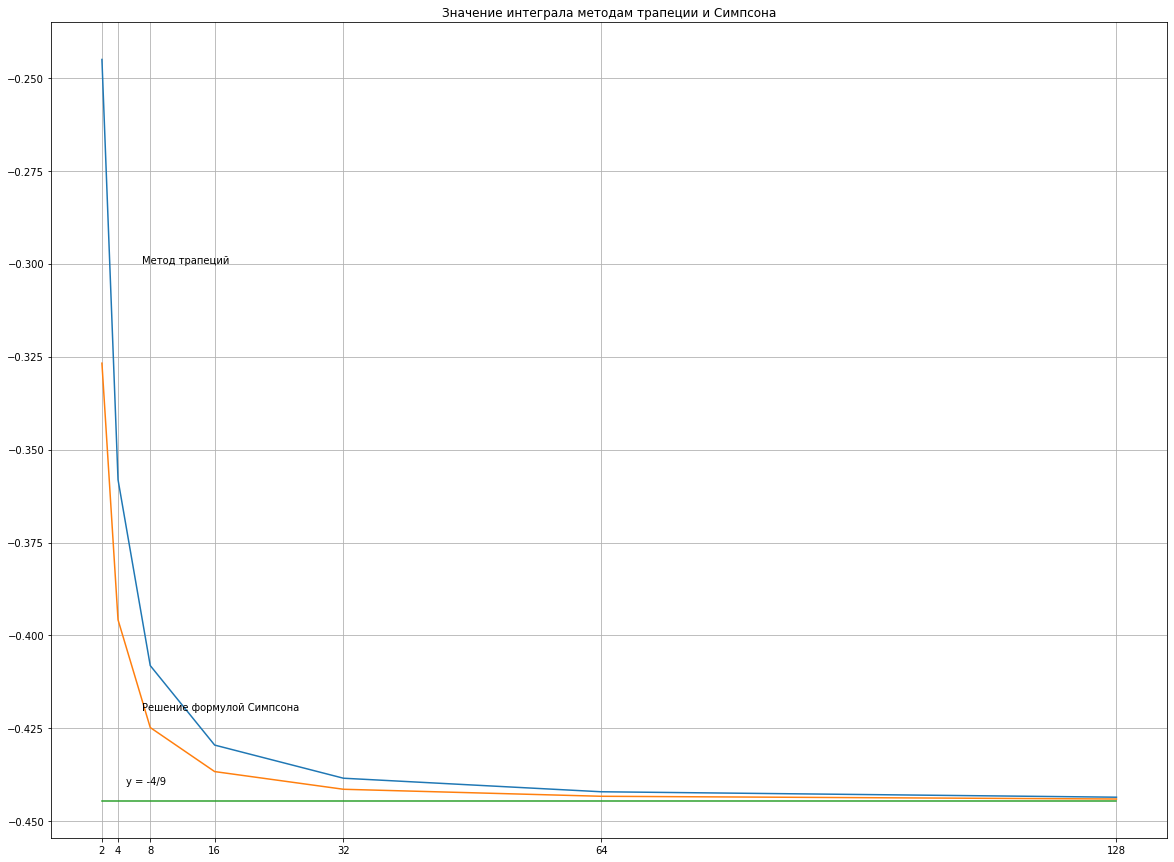

In [101]:
metod_trapecii=Metod_Trapecii(cislo_uzlov)
metod_simps=Metod_Simpsona(cislo_uzlov)
VipisatZnaceniyaMetoda(metod_trapecii)
VipisatZnaceniyaMetoda(metod_simps)
NarisovatGrafik([metod_trapecii,metod_simps,funk_znac],[[5,-0.44, "y = -4/9"],[7,-0.3, "Метод трапеций"],[7,-0.42, "Решение формулой Симпсона"]],"Значение интеграла методам трапеции и Симпсона")

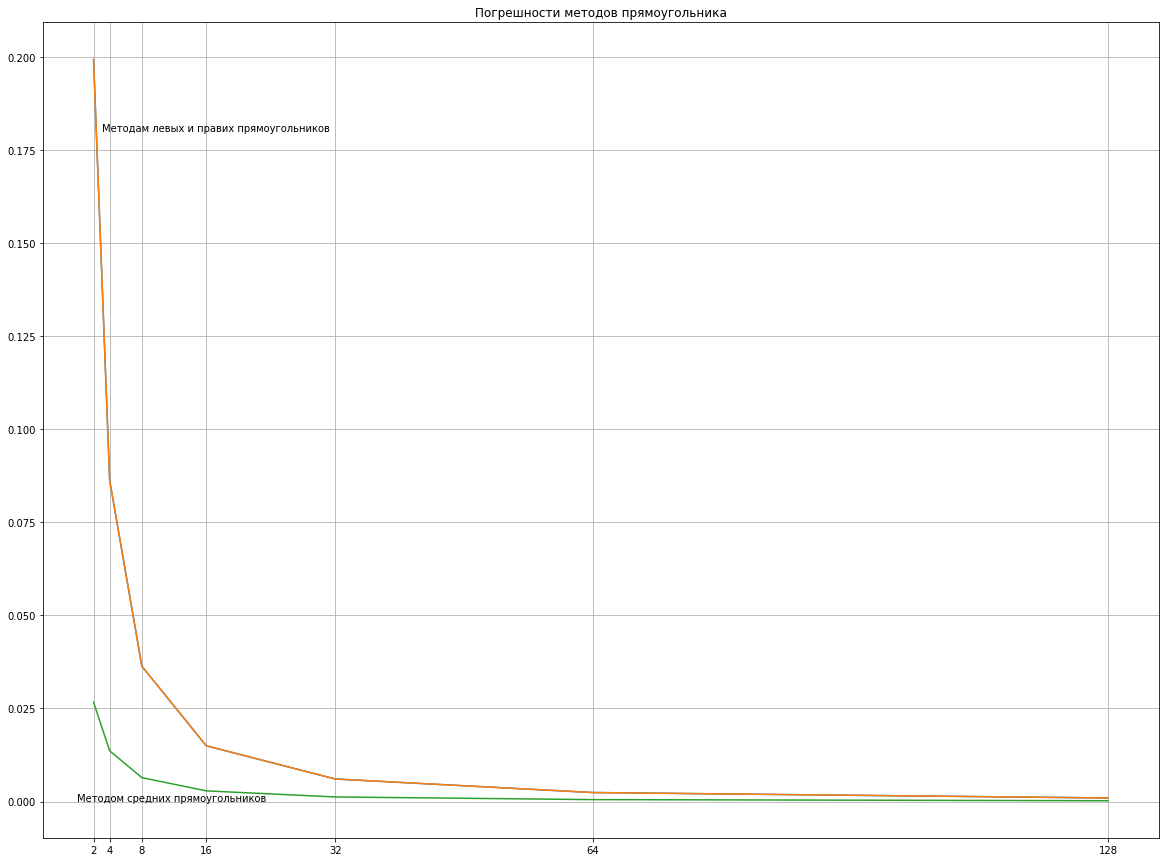

In [102]:
NarisovatGrafik([abs(levie_pramo - funk_znac),abs(pravie_pramo-funk_znac),abs(srednie_pramo-funk_znac)],[[3,0.18,"Методам левых и правих прямоугольников"],[0.0,0.0,"Методом средних прямоугольников"]],"Погрешности методoв прямоугольника")

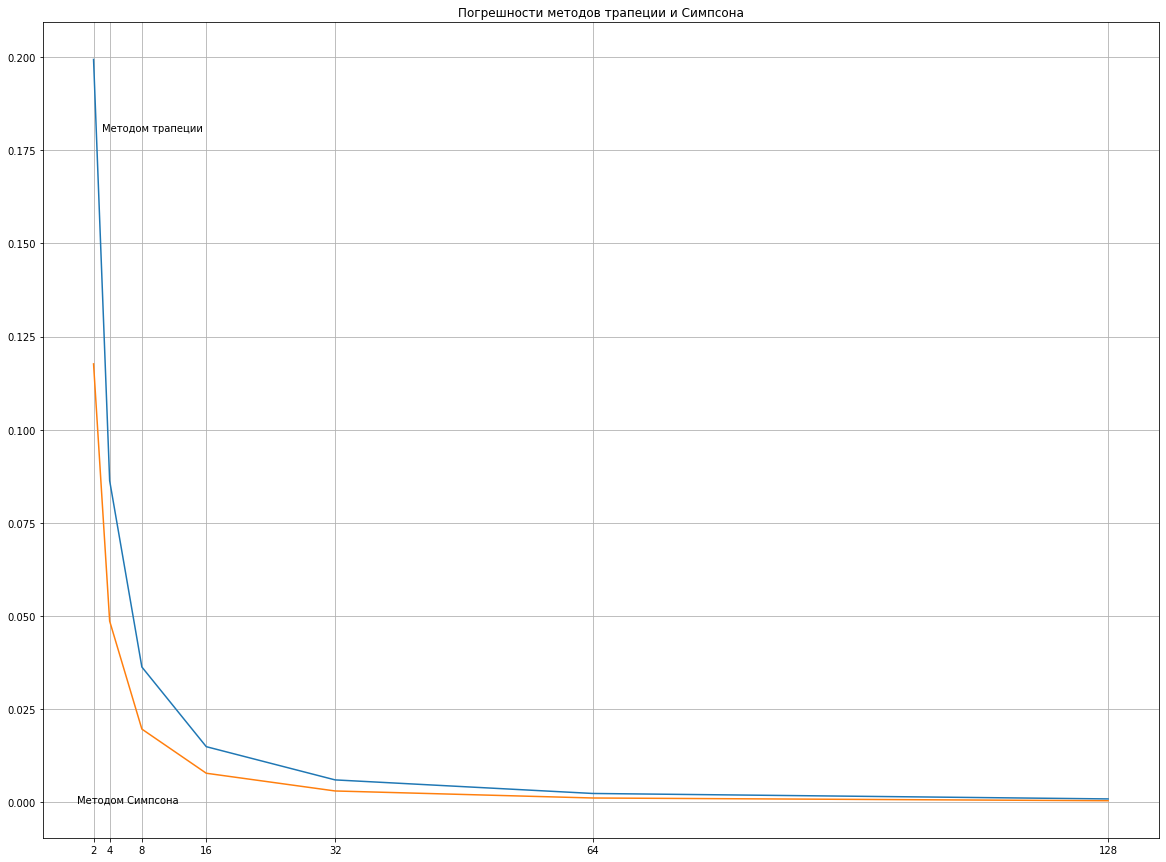

In [103]:
NarisovatGrafik([abs(metod_trapecii-funk_znac),abs(metod_simps-funk_znac)],[[3,0.18,"Методом трапеции"],[0.0,0.0,"Методом Симпсона"]],"Погрешности методов трапеции и Симпсона")

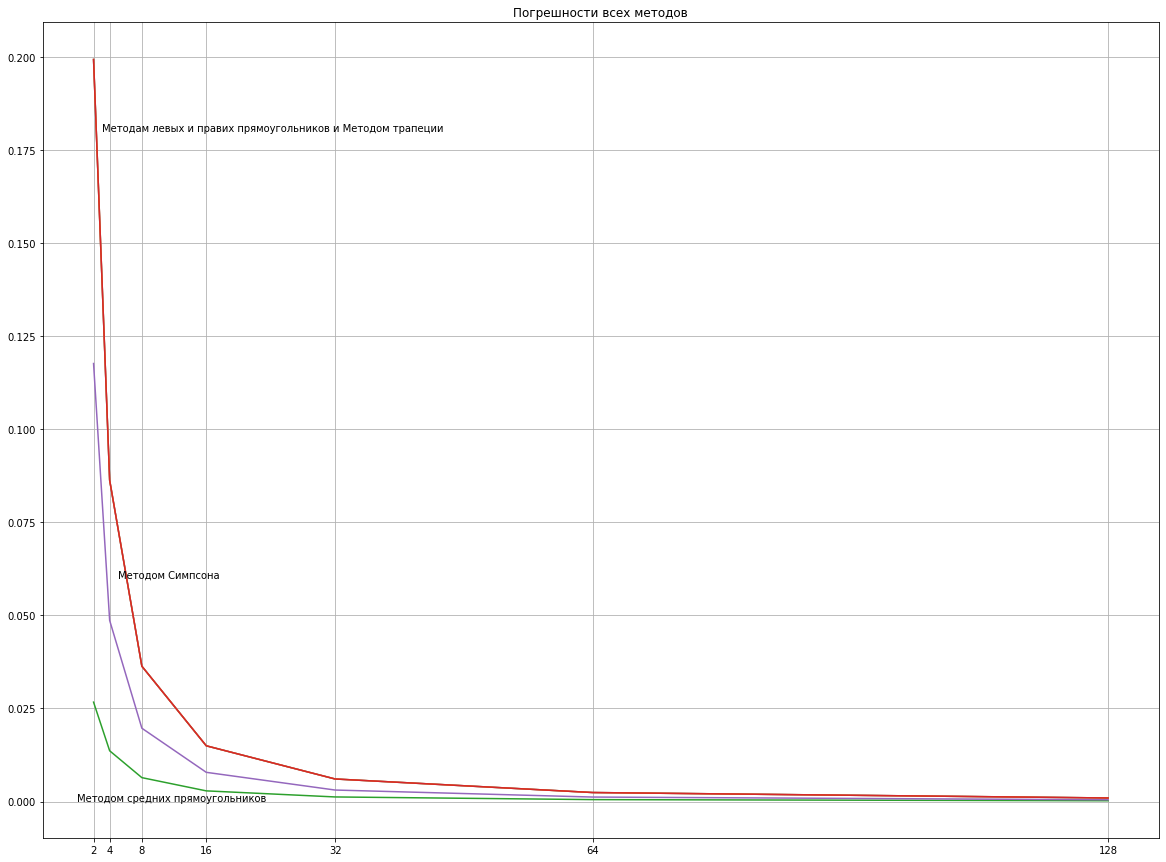

In [104]:
NarisovatGrafik([abs(levie_pramo-funk_znac),abs(pravie_pramo-funk_znac),abs(srednie_pramo-funk_znac),abs(metod_trapecii-funk_znac),abs(metod_simps-funk_znac)],[[3,0.18,"Методам левых и правих прямоугольников и Методом трапеции"],[5,0.06,"Методом Симпсона"],[0.0,0.0,"Методом средних прямоугольников"]],"Погрешности всех методов")

# Выводы:
## -Разница между методами левых/правых прямоугольников оказалась очень маленькой (меньше 0.0001),поэтому на графике не видно
## -В датом примере самым лучшим оказался метод средных прямоугольников:
## 1)так как количество узлов маленькое(при количеству узлов стремящемся к бесконечности лучшим бы оказался способ Симпсона)
## 2)Зависит от взгляда функции на датом промежутке(опять возвращаемся к числу узлов,так как их мало любой метод может оказаться лучшим,здесь это метод средних прямоугольников
## -Лучшим методом вычисления является метод Симпсона,потому что имеет 4ый порядок сходимости